# TASK 01:-Prediction Using Supervised ML

### Predict the percentege of an student based on the number of study hours.
### Libraries/Datasets Used: Scikit Learn, Pandas, Numpy, SAS Enterprise Miner or any other tool.
### Task completed during Data Science & Analytics Internship @ The Sparks Foundation


### By Sulem Bakrawala

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


**Reading the csv file that is given in Task Sheet**

In [2]:
df = pd.read_csv('result.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.size

50

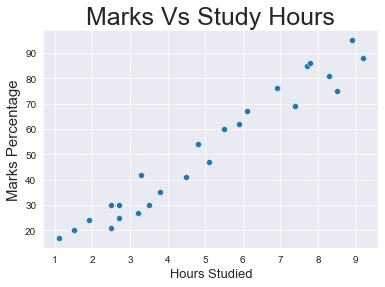

In [5]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=13)
plt.show()

*There should be a correlation between the 'Marks Percentage' and 'Hours Studied' as we see look into above scatter plot.Now lets plot a regression line to confirm the correlation.*

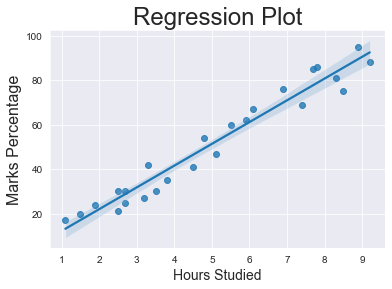

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=24)
plt.ylabel('Marks Percentage', size=16)
plt.xlabel('Hours Studied', size=14)
plt.show()
print(df.corr())

*It is confirmed that the variables are positively correlated.*

## TRAINING THE MODEL

### 1.) Splitting the Data

In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2.) Fitting Data into model.

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("********Model Trained********")

********Model Trained********


## PREDICTION STEP

### Predicting the percentage of marks

In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparison of Predicted Marks with Actual Marks

In [10]:
comparing_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
comparing_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Comparing the Actual Marks with Predicted Marks Graphically.

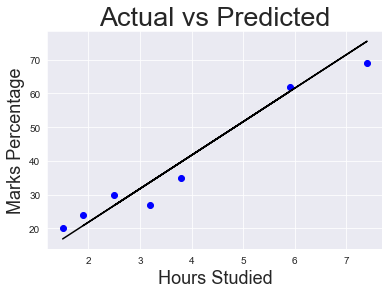

In [11]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=27)
plt.ylabel('Marks Percentage', size=18)
plt.xlabel('Hours Studied', size=18)
plt.show()


## Evaluating the model.

### Calculating Mean Absolute Error

In [12]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


### Calculating the accuracy of Model.(Out of 100)

In [13]:
regression.score(val_X, val_y)

0.9367661043365056

**Above "Mean absolute error" and "Accuracy" states that the chances of error or wrong forecasting through the model are very less(around 6%).**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**